In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def two_hist(x, y, norm = 1):
    from sklearn.preprocessing import scale
    if norm == 1:
        x = pd.Series(scale(x), name=x.name).dropna()
        y = pd.Series(scale(y), name=y.name).dropna()
    x.hist(alpha=0.5, weights=[1/len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1/len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])
    print(f'Normalized = {"Yes" if norm else "No"}, {x.name}.mean = {round(x.mean(), 2)}, {y.name}.mean = {round(y.mean(), 2)}')

# для построения точечного графика (подаем х и у)
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):
    _, ax = plt.subplots()
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.8)

    if yscale_log == True:
        ax.set_yscale('log')

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    
# для построения распределения (подаем массив)    
def distribution(x):
    distribution = seaborn.distplot(x)
    fig = distribution.get_figure() 


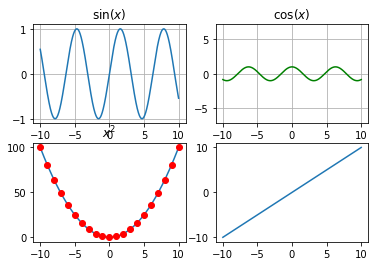

In [3]:
x = np.arange(-10, 10.01, 0.01)  # от -10 до 10.01 с шагом 0.01 (>1000 точек)
t = np.arange(-10, 11, 1)   # от -10 до 11 с шагом 1 (20 точек)



#subplot 1
plt.subplot(221)            # первая область
plt.plot(x, np.sin(x))      # sin(x) на [-10, 10] цветом по умолчанию
plt.title(r'$\sin(x)$')     # заголовок "sin(x)"
plt.grid(True)              # рисовать решетку

#subplot 2
plt.subplot(222)            # вторая область
plt.plot(x, np.cos(x), 'g') # cos(x) на [-10, 10] зеленая линия
plt.axis('equal')           # одинаковый масштаб по осям Х и Y
plt.grid(True)              # рисовать решетку
plt.title(r'$\cos(x)$')     # заголовок "cos(x)"

#subplot 3
plt.subplot(223)            # третья область
plt.plot(x, x**2, t, t**2, 'ro') # 2 графика, первый линией, второй красными кругами
plt.title(r'$x^2$')         # заголовок "x2"
                            # решетки нет

#subplot 4
plt.subplot(224)            # четвертая область
plt.plot(x, x)              # прямая y=x
                            # оси с подписями нарисовать
                            # левую в центре


plt.show()

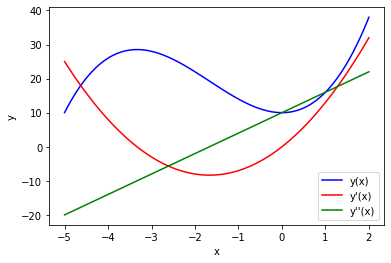

In [4]:
x = np.linspace(-5, 2, 100)                     # от -5 до 2 сделать 100 точек
y1 = x**3 + 5*x**2 + 10                         # y1 - тоже много точек
y2 = 3*x**2 + 10*x
y3 = 6*x + 10

fig, ax = plt.subplots()                        # будет 1 график, на нем:
ax.plot(x, y1, color="blue", label="y(x)")      # функция y1(x), синий, надпись y(x)
ax.plot(x, y2, color="red", label="y'(x)")      # функция y2(x), красный, надпись y'(x)
ax.plot(x, y3, color="green", label="y''(x)")   # функция y3(x), зеленый, надпись y''(x)
ax.set_xlabel("x")                              # подпись у горизонтальной оси х
ax.set_ylabel("y")                              # подпись у вертикальной оси y
ax.legend()                                     # показывать условные обозначения

plt.show()

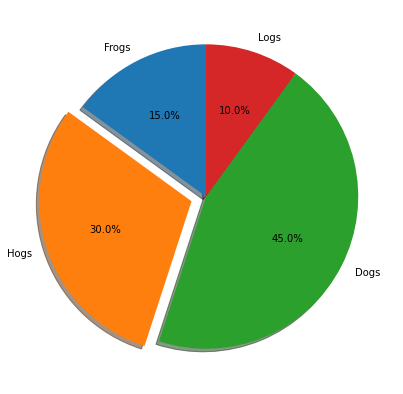

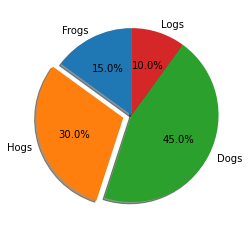

In [5]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
   
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_figwidth(7)    #  ширина и
fig1.set_figheight(7) 
   
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90 )
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

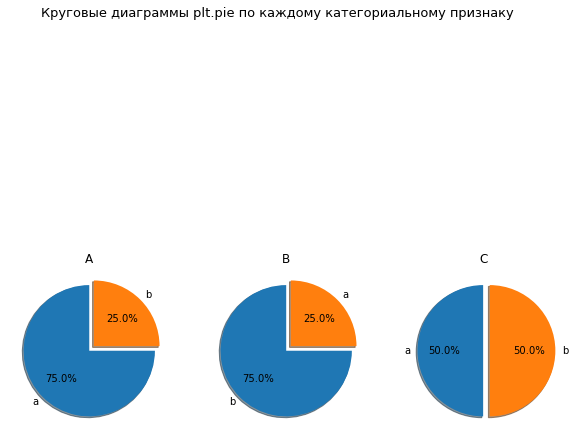

In [31]:
data = pd.DataFrame({'A': ['a','a','a','b'], 'B': ['b','b','a','b'], 'C': ['a','b','a','b']})
fig, a = plt.subplots(ncols=3, nrows=1, figsize=(10, 10))
fig.suptitle("Круговые диаграммы plt.pie по каждому категориальному признаку", fontsize=13)
for col,ax in zip(data, a.ravel()):
    p = data[col].value_counts()
    ax.pie(p, labels=p.index, explode = (0, 0.1),autopct='%1.1f%%', shadow=True, startangle=90)
    ax.set_title(col)

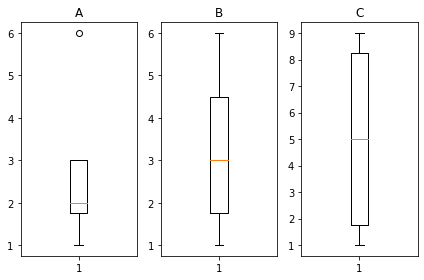

In [42]:
data = pd.DataFrame({'A': [1,2,6,2], 'B': [4,2,1,6], 'C': [1,2,9,8]})
fig, axs = plt.subplots(1, len(num_cols))
axs = axs.ravel()

for x in range(len(num_cols)):
  column = data.columns[x]
  axs[x].boxplot(data.loc[:,column])
  axs[x].set_title(column)
fig.tight_layout()

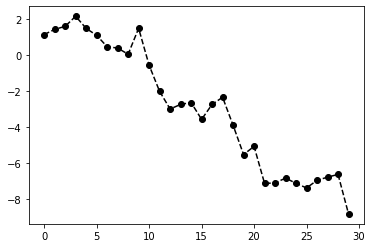

In [7]:
from numpy.random import randn
plt.plot(randn(30).cumsum(),'ko--')
plt.show()

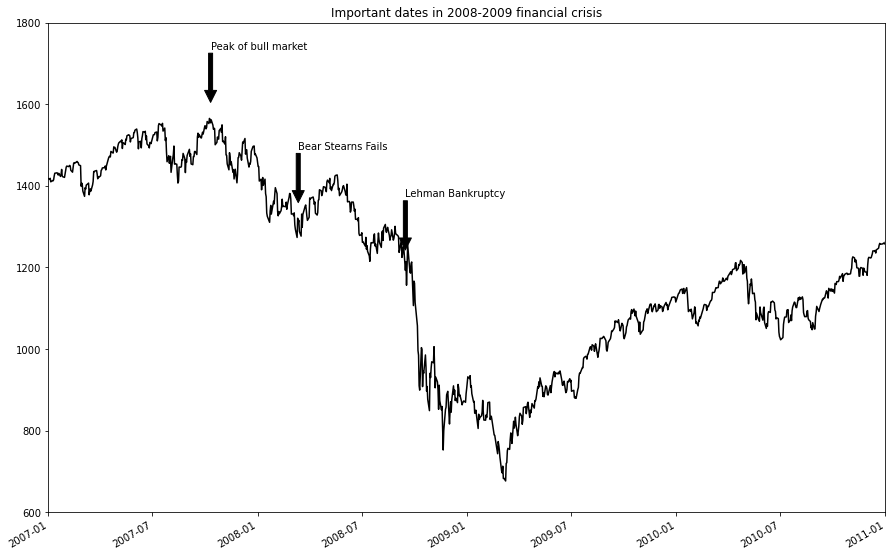

In [8]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')
crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),  (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy')]
for date, label in crisis_data:  
    ax.annotate(label, xy=(date, spx.asof(date) + 50), 
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),              
                horizontalalignment='left', verticalalignment='top')
# # Оставить только диапазон 2007-2010 
fig.set_figwidth(15)
fig.set_figheight(10)
ax.set_xlim(['1/1/2007', '1/1/2011']) 
ax.set_ylim([600, 1800])
ax.set_title('Important dates in 2008-2009 financial crisis')
plt.show()


Text(0.5, 0, 'Stage')

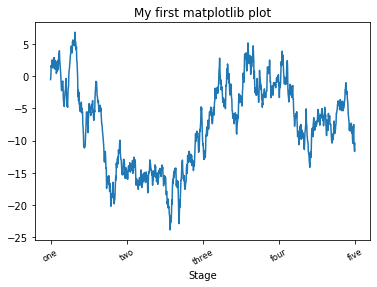

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000]) 
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stage')

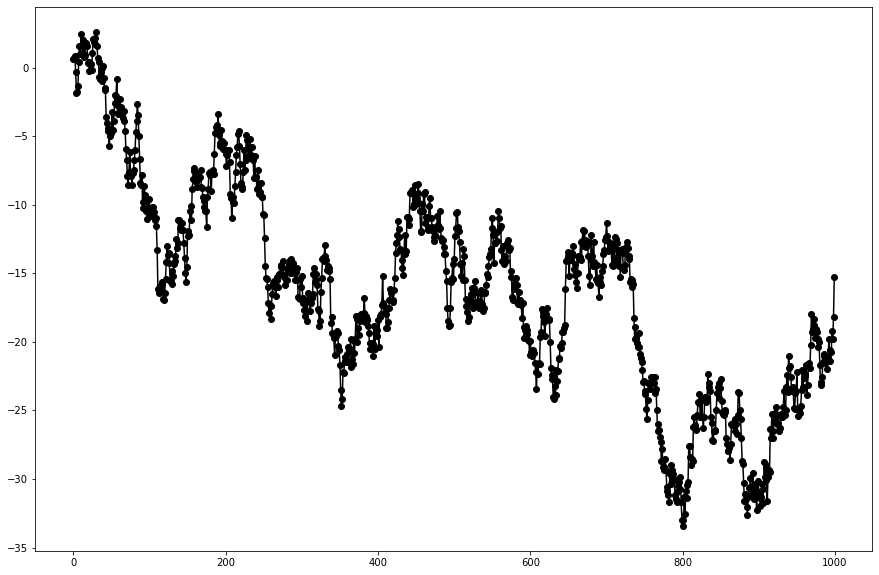

In [10]:
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)
plt.plot(randn(1000).cumsum(),'ko-')

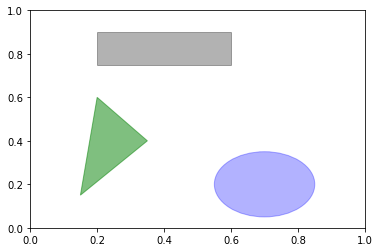

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((0.2,0.75),0.4,0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7,0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='g',alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

<AxesSubplot:>

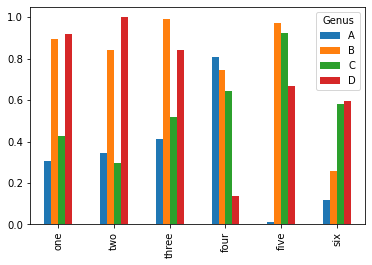

In [12]:
df = pd.DataFrame(np.random.rand(6,4),
                 index=['one','two','three','four','five','six'],
                 columns=pd.Index(['A','B','C','D'], name='Genus'))
df.plot.bar()

/home/andrey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


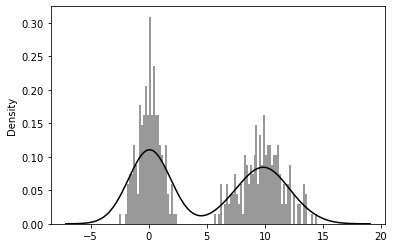

In [13]:
import seaborn as sns
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(values,bins=100,color='k');

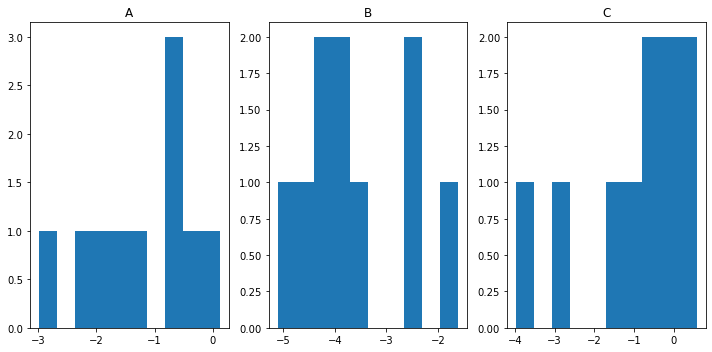

In [14]:
data = pd.DataFrame(np.random.randn(10,4).cumsum(0), columns=['A','B','C','D'])
num_cols = ['A','B','C']
                    
f,a = plt.subplots(ncols=3, nrows=1, figsize=(10, 5))
a = a.ravel()
for col,ax in zip(data[num_cols],a):
    ax.hist(data[col])
    ax.set_title(col)
plt.tight_layout()

<AxesSubplot:>

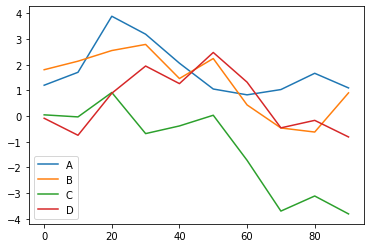

In [15]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0), columns=['A','B','C','D'], index=np.arange(0,100,10))
df.plot()

<AxesSubplot:>

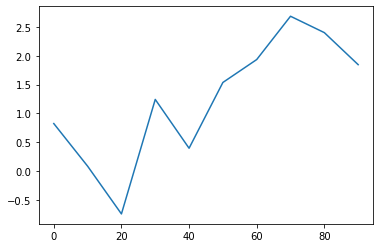

In [16]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

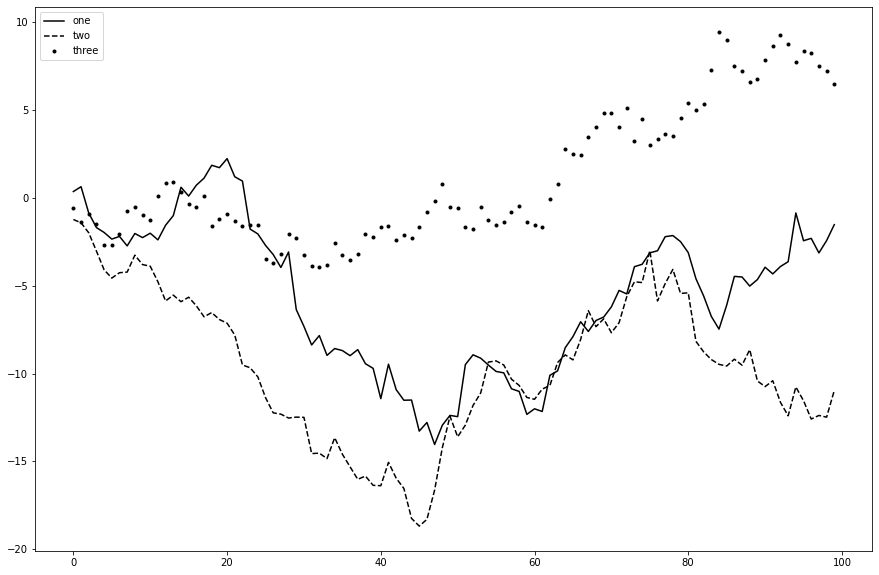

In [17]:
from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(100).cumsum(),'k',label='one')
ax.plot(randn(100).cumsum(),'k--',label='two')
ax.plot(randn(100).cumsum(),'k.',label='three')
fig.set_figwidth(15)
fig.set_figheight(10)
plt.legend(loc='best')
plt.show()

/home/andrey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/andrey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/andrey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

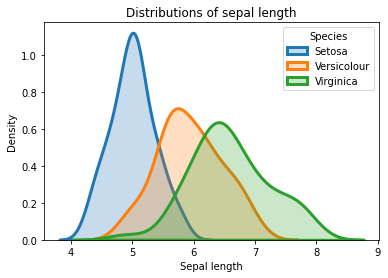

In [18]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
X = iris.data[:, :1]  # sepal length
y = iris.target
labels = ["Setosa", "Versicolour", "Virginica"]

for i in range(3):
  sns.distplot(X[y==i], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label=labels[i])
plt.xlabel("Sepal length")
plt.ylabel("Density")
plt.title("Distributions of sepal length")
plt.legend(title="Species");

Сейчас пора, когда многие болеют. Построим зависимость числа больных в семье Ивановых и Сидоровых от температуры на улице.

Мы имеем дискретное распределение, поэтому самое напрашиваемое представление это обычные точки

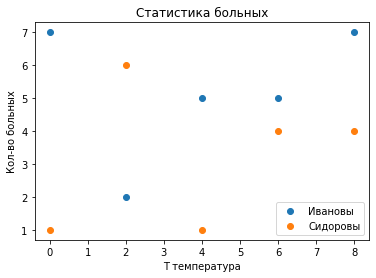

In [19]:
family_ivan = np.random.poisson(5, 5)
family_sid = np.random.poisson(5, 5)

x = np.arange(0, 10, 2)
plt.scatter(x, family_ivan, label='Ивановы')
plt.scatter(x, family_sid, label='Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

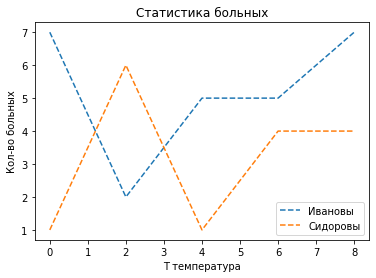

In [20]:
# Чтобы отследить зависмость лучше, воспользуемся непрерывным представление

plt.plot(x, family_ivan, '--', label='Ивановы')
plt.plot(x, family_sid, '--', label='Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

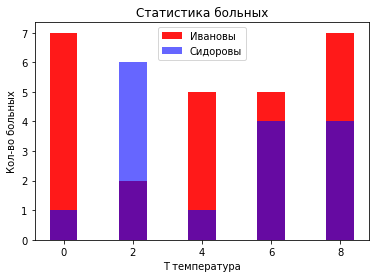

In [21]:
# Давайте попробуем другое представление полученных данных c помощью bar-chart:
plt.bar(x, family_ivan, alpha=0.9
      , label='Ивановы', color='r')
plt.bar(x, family_sid, alpha=0.6, label='Сидоровы', color='b')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

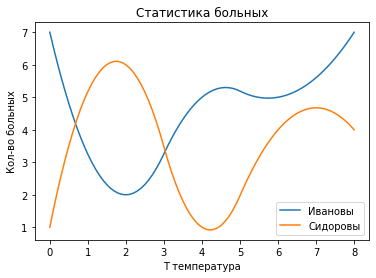

In [22]:
# Давайте функции зависимоcти сделаем более гладкими:
from scipy.interpolate import interp1d
f_ivan = interp1d(np.arange(0, 10, 2), family_ivan, kind='quadratic', fill_value="extrapolate")
f_sid = interp1d(np.arange(0, 10, 2), family_sid, kind='quadratic', fill_value="extrapolate")

xnew = np.arange(0, 8.1, 0.1)
ynew_ivan = f_ivan(xnew)
ynew_sid = f_sid(xnew)
plt.plot(xnew, ynew_ivan, label='Ивановы')
plt.plot(xnew, ynew_sid, label='Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

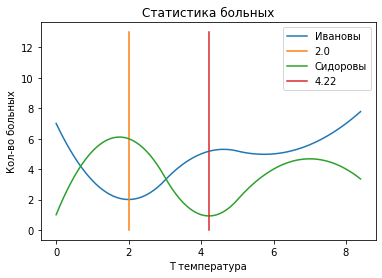

In [23]:
# Найдем самую оптимальную температуру для каждой семьи

from scipy.optimize import minimize
max_ivan = minimize(f_ivan, x0=4)
max_sid = minimize(f_sid, x0=4)

xnew = np.arange(0, 8.5, 0.1)
ynew_ivan = f_ivan(xnew)
ynew_sid = f_sid(xnew)
plt.plot(xnew, ynew_ivan, label='Ивановы')
plt.plot([max_ivan.x[0]] * 14, np.arange(0, 14), label='{}'.format(max_ivan.x[0].round(2)))
plt.plot(xnew, ynew_sid, label='Сидоровы')
plt.plot([max_sid.x[0]] * 14, np.arange(0, 14), label='{}'.format(max_sid.x[0].round(2)))
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()